In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [3]:
def get_area(gray_image, mask, threshold):
    '''
    Go through the image and get the area of all the pixels above the threshold
    '''
    total = 0
    count = 0
    new_mask = np.zeros(mask.shape)
    for y in range(mask.shape[0]):
        for x in range(mask.shape[1]):
            if mask[y, x]:
                pixel_value = gray_image[y,x][0]
                if pixel_value >= threshold: 
                    total += 1
                    new_mask[y,x] = 1
                count += 1

    print(total/count)
    return new_mask

def get_gradient(gray_image, masks, scores):
    '''
    Go layer by layer during the image
    Plot the 
    '''
    main_mask, _ = get_main_mask(masks, scores)

    gradient = []
    for y in range(main_mask.shape[0]):
        total = 0
        count = 0
        for x in range(main_mask.shape[1]):
            if main_mask[y, x]:
                total += gray_image[y,x][0]
                count += 1
        if count != 0:
            gradient.append(total // count)
        else:
            gradient.append(0)

    return gradient

def get_main_mask(masks, scores):
    sorted_masks = sorted(zip(masks, scores), key=lambda x: x[1], reverse=True)
    for mask in sorted_masks: print(mask[1])
    main_mask = sorted_masks[0][0]
    main_mask_score = sorted_masks[0][1]
    return main_mask, main_mask_score

In [4]:
sam = sam_model_registry["default"](checkpoint="../../../Downloads/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)


In [35]:
image_number = 5
image_name = '../plot_images/'+str(image_number)+'.png'

In [33]:
image = cv2.imread(image_name)

In [17]:
height, width = image.shape[:2]
input_point = np.array([[width // 2, height // 2 + 50]])
input_label = np.array([1])

In [18]:
predictor.set_image(image)

In [19]:
masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

0.9994037
0.9768059
0.8806349


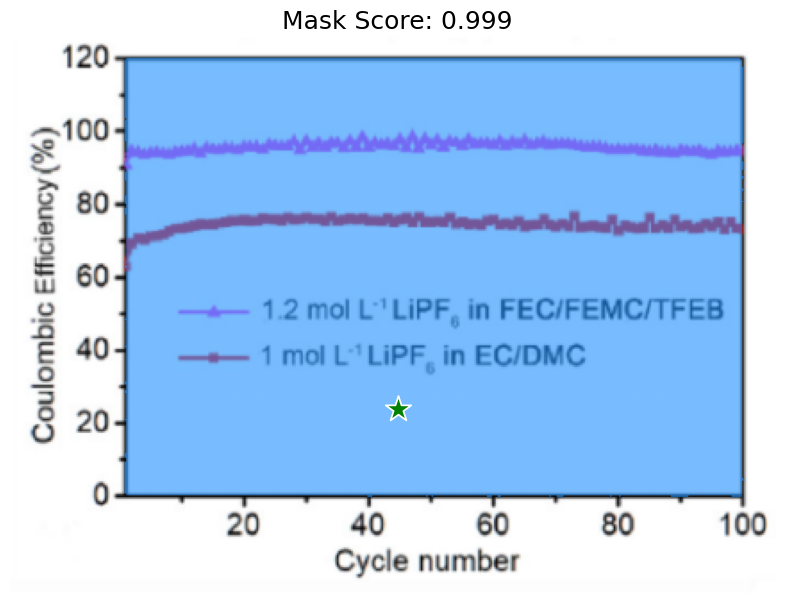

In [20]:
main_mask, main_mask_score = get_main_mask(masks, scores)
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(main_mask, plt.gca())

show_points(input_point, input_label, plt.gca())
plt.title(f"Mask Score: {main_mask_score:.3f}", fontsize=18)
plt.axis('off')
plt.show()

In [21]:
new_image = image.copy()
print(image.shape)

print(new_image.shape)

boundingBox = {
    "topLeft": None,
    "bottomRight": [0,0],
}

topLeft = False

for i in range(len(new_image)):
    for j in range(len(new_image[0])):
        if not main_mask[i][j]:
            new_image[i][j] = [0, 0, 0]
        else:
            print(i, j)
            if not topLeft:
                boundingBox["topLeft"] = [j, i]
                topLeft = True
            boundingBox["bottomRight"] = [max(boundingBox["bottomRight"][0], j), max(boundingBox["bottomRight"][1], i)]
        



(316, 434, 3)
(316, 434, 3)
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
12 80
12 81
12 82
12 83
12 84
12 85
12 86
12 87
12 88
12 89
12 90
12 91
12 92
12 93
12 94
12 95
12 96
12 97
12 98
12 99
12 100
12 101
12 102
12 103
12 104
12 105
12 106
12 107
12 108
12 109
12 110
12 111
12 112
12 113
12 114
12 115
12 116
12 117
12 118
12 119
12 120
12 121
12 122
12 123
12 124
12 125
12 126
12 127
12 128
12 129
12 130
12 131
12 132
12 133
12 134
12 135
12 136
12 137
12 138
12 139
12 140
12 141
12 142
12 143
12 144
12 145
12 146
12 147
12 148
12 149
12 150
12 151
12 152
12 153
12 154
12 155
12 156
12 157
12 158
12 159
12 160
12 161
12 162
12 163
12 164
12 165
12 166
12 167
12 168
12 169
12 170
12 171
12 172
12 173
12 174
12 175
12 176
12 177
12 178
12 179
12 180
12 181
12 182
12 183
12 184
12 185
12 186
12 187
12 188
12 189
12 190
12 191
12 192
12 193
12 194
12 195
12 196
12 197
12 198
12 199
12 200
12 201
12 202
12 203
12 204
12 205
12 206
12 207
12 208

In [22]:
print(boundingBox)

{'topLeft': [65, 12], 'bottomRight': [410, 257]}


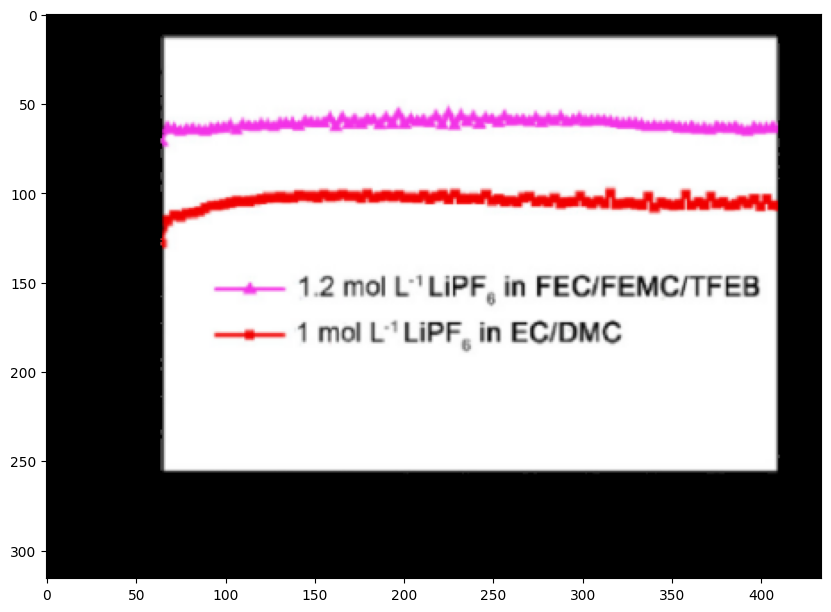

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)

In [24]:
points = np.array([
    boundingBox["topLeft"], 
    [boundingBox["topLeft"][0], boundingBox["bottomRight"][1]], 
    [boundingBox["bottomRight"][0], boundingBox["topLeft"][1]], 
    boundingBox["bottomRight"]
])

In [25]:
points

array([[ 65,  12],
       [ 65, 257],
       [410,  12],
       [410, 257]])

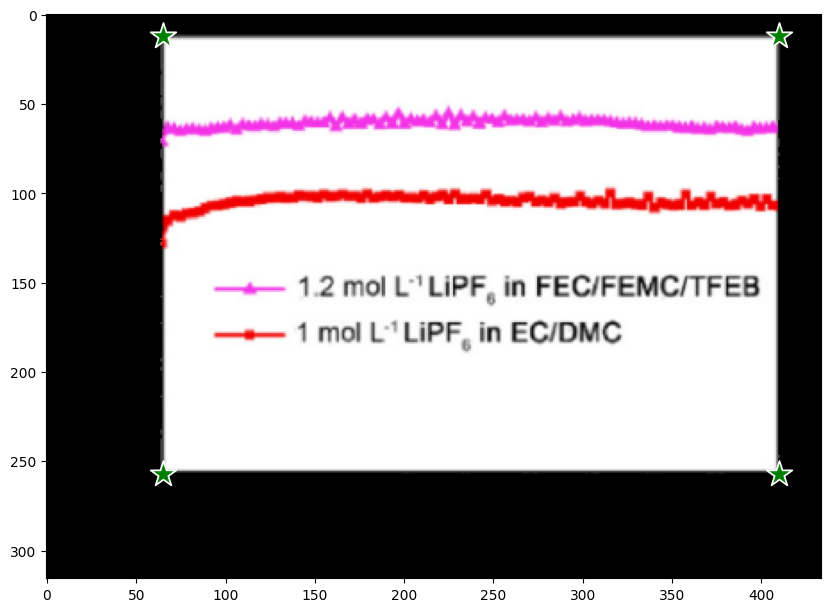

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)
show_points(points, np.array([1,1,1,1]), plt.gca())
plt.show()

In [27]:
# FROM GPT: RANGE X AXIS, Y AXIS
x_axis = [0, 100]
y_axis = [0, 120]

In [28]:
width = boundingBox["bottomRight"][0] - boundingBox["topLeft"][0]
height = boundingBox["bottomRight"][1] - boundingBox["topLeft"][1]

In [40]:
wBox = 100
hBox = 100


1
2
3
4
5
6
7
8
9
10
11
12


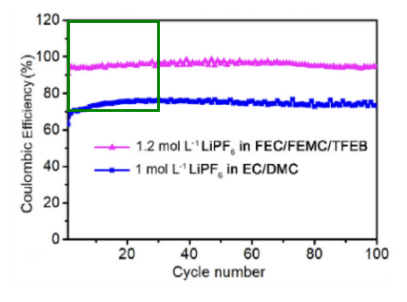

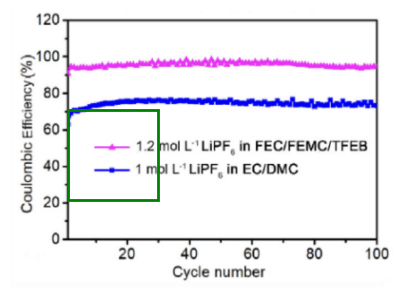

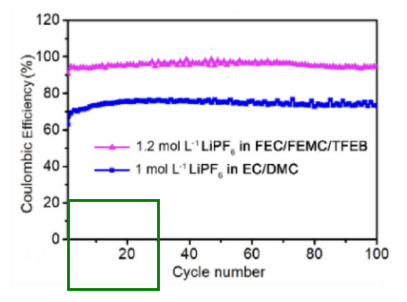

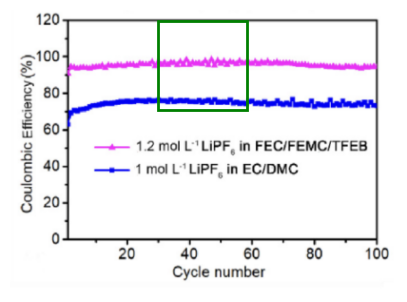

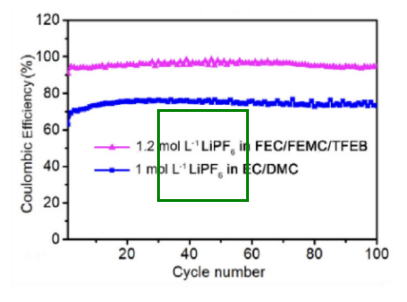

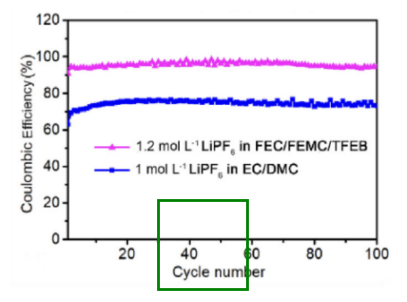

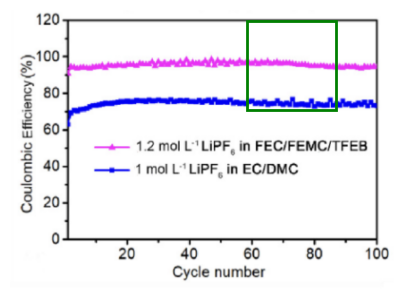

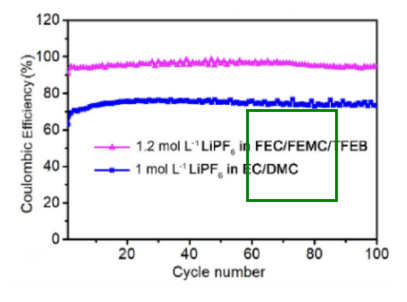

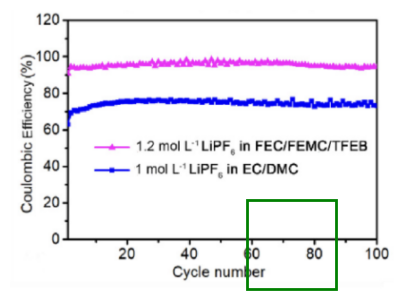

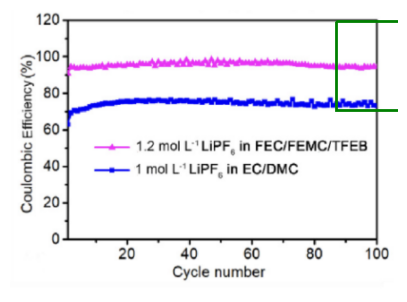

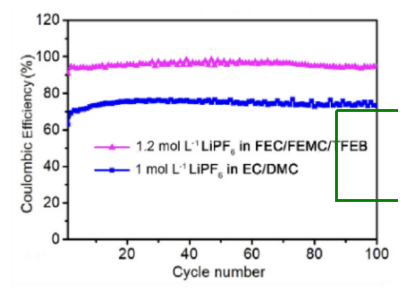

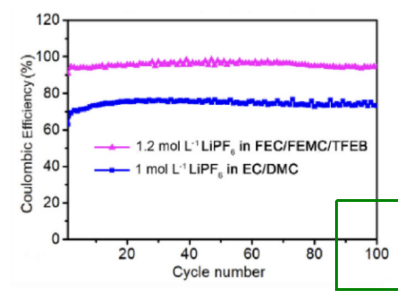

In [41]:
from PIL import Image

graph = []
count = 1

new_image = Image.open(image_name)

for x0 in range(boundingBox["topLeft"][0], boundingBox["bottomRight"][0], wBox):
    for y0 in range(boundingBox["topLeft"][1], boundingBox["bottomRight"][1], hBox):
        plt.figure(figsize=(5,5))
        plt.axis('off')
        # im1 = new_image.crop((x0, y0, x0 + wBox, y0 + hBox))
        plt.imshow(new_image)

        yellowSquare = plt.gca().add_patch(plt.Rectangle((x0, y0), wBox, hBox, edgecolor='green', facecolor=(0,0,0,0), lw=2))
        plt.savefig('../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/' + str(count) + '.png')

        print(count)

        graph.append((x0, y0))
        
        count += 1

In [42]:
def convertPoint(point):
    x = (point[0] - boundingBox["topLeft"][0]) * (x_axis[1] - x_axis[0]) / width
    y = y_axis[1] - (point[1] - boundingBox["topLeft"][1]) * (y_axis[1] - y_axis[0]) / height
    return [x, y]


In [43]:
converted = list(map(convertPoint, graph))

In [44]:
def getColoredGrid(image_name, color, save_name):
    new_image = Image.open(image_name)

    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.imshow(new_image)

    count = 0

    for x0 in range(boundingBox["topLeft"][0], boundingBox["bottomRight"][0], wBox):
        for y0 in range(boundingBox["topLeft"][1], boundingBox["bottomRight"][1], hBox):
            
            if color and count < len(color) and color[count] == 1:
                plt.gca().add_patch(plt.Rectangle((x0, y0), wBox, hBox, edgecolor='orange', facecolor=(1, 0.5, 0, 0.5), lw=2))
            
            else:
                plt.gca().add_patch(plt.Rectangle((x0, y0), wBox, hBox, edgecolor='orange', facecolor=(0,0,0,0), lw=2))
            
            count+=1

    plt.savefig(save_name)

In [47]:
'''
1 - There is a point
0 - There is no point

Each index (i) represents the points in the image i + 1
'''

# ASK CHAT GPT ABOUT THE EXISTENCE OF PLOT POINTS - 100 x 100 pixel squares
pink_100 = [ 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
blue_100 = [ 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


# BY HAND DETERMINE IF THERE ARE ANY PLOT POINTS - 100 x 100 pixel squares
real_pink_100 = [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
real_blue_100 = [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]

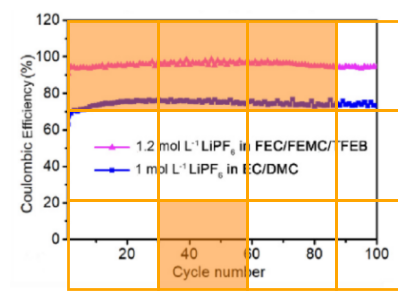

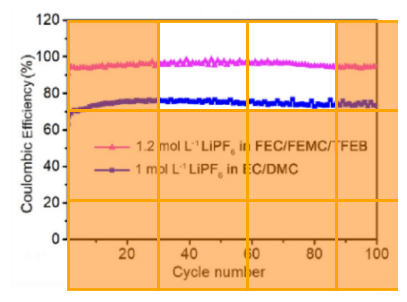

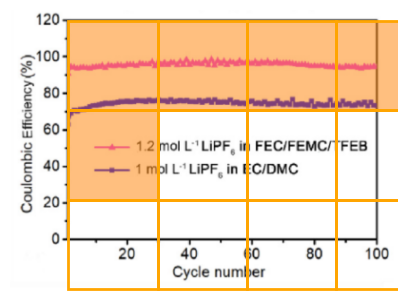

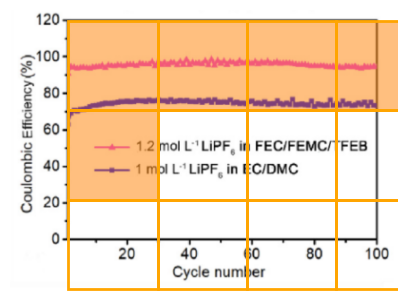

In [53]:
save_names = [
    '../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/pink_'+str(wBox)+'.png', 
    '../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/blue_'+str(wBox)+'.png',
    '../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/real_pink_'+str(wBox)+'.png', 
    '../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/real_blue_'+str(wBox)+'.png'
]
coordinates = [
    pink_100,
    blue_100,
    real_pink_100, 
    real_blue_100
]
for i, save_name in enumerate(save_names):
    getColoredGrid(image_name, coordinates[i], save_name)

In [54]:
def x_y(coordinates, values, title, x_axis_title, y_axis_title, filename, c, x_range, y_range):

    plt.figure(figsize=(10,6))
    for index, value in enumerate(values):
        x = []
        y = []

        for i in range(len(value)):
            if value[i] == 1: 
                x.append(coordinates[i][0])
                y.append(coordinates[i][1])
        
        plt.plot(x, y, label=c[index], color=c[index], marker='o')

    plt.xlim(x_range[0], x_range[1])
    plt.ylim(y_range[0], y_range[1])

    # Add title and labels
    plt.title(title)
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename)

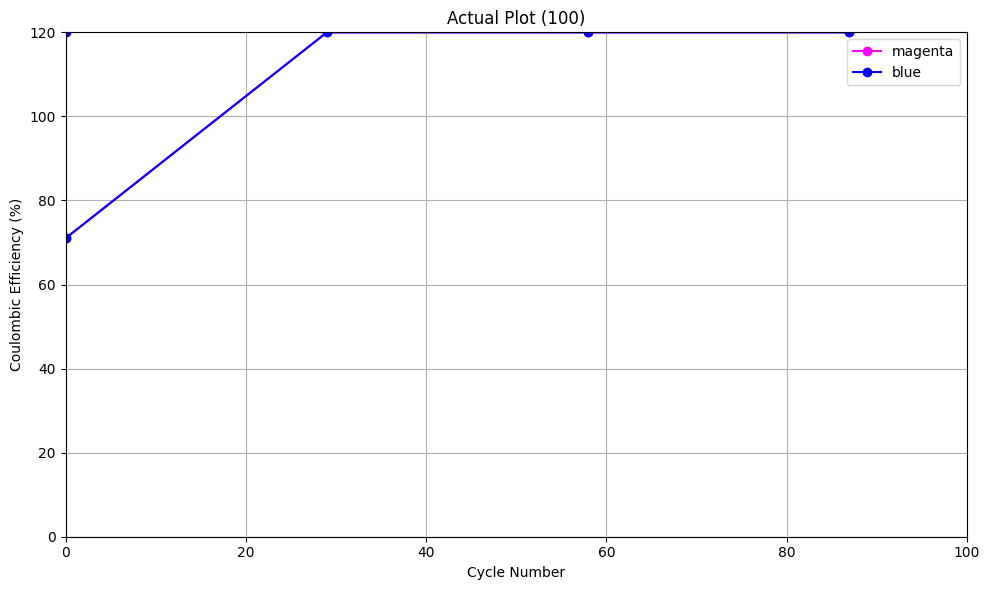

In [55]:

x_y(
        converted, 
        [real_pink_100, real_blue_100], 
        "Actual Plot (100)", 
        "Cycle Number", 
        "Coulombic Efficiency (%)", 
        '../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/real_line_'+str(wBox)+'.png', 
        ['magenta', 'blue'], 
        x_axis, 
        y_axis
)

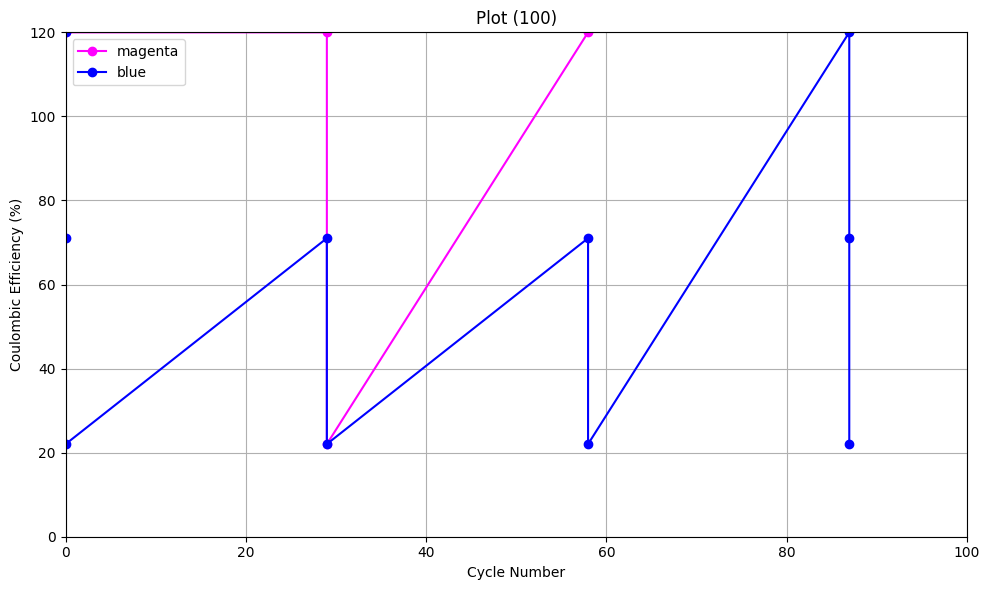

In [56]:
x_y(
    converted, 
    [pink_100, blue_100], 
    "Plot (100)", 
    "Cycle Number", 
    "Coulombic Efficiency (%)", 
    '../bounding_box_images/'+str(image_number)+'_'+str(wBox)+'/line_'+str(wBox)+'.png', 
    ['magenta', 'blue'], 
    x_axis, 
    y_axis
)